<a href="https://colab.research.google.com/github/Maiven/personal_kaggle/blob/main/kaggle_Data_Science_in_the_Cloud_Who_wins_the_cloud_war%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://www.kaggle.com/nitishabharathi/data-science-in-the-cloud-who-wins-the-cloud-war

In [ ]:
import plotly.graph_objects as go
amazon_color = '#FF9900'
google_color = '#DB4437'
azure_color = '#008AD7'
text =['32%','17%','6%']
colors = [amazon_color,azure_color,google_color,'#40E0D0']

fig = go.Figure(data=[go.Pie(labels=['Amazon Web Services','Microsoft Azure','Google Cloud Platform','Others'],
                             values=[32,17,6,45])])
fig.update_traces(title = '<b>Cloud Service Providers Market Share Q1 2020</b>',titlefont_size=16,hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors))
#fig.update_layout(margin_pad = 10)
fig.show()

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import seaborn as sns
%matplotlib inline
import plotly.express as px


from IPython.core.display import HTML
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('/content/kaggle_survey_2020_responses.csv',low_memory=False)
data.drop(0,inplace=True)
data.drop('Time from Start to Finish (seconds)',axis=1,inplace=True)
data.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom',inplace = True)
data.replace('Viet Nam','Vietnam',inplace=True)
data.replace('Iran, Islamic Republic of...','Iran',inplace=True)

df_2019 = pd.read_csv('/content/multiple_choice_responses.csv',low_memory=False)
df_2019.drop(0,inplace=True)
df_2019 = df_2019.dropna(subset=['Q29_Part_1',
'Q29_Part_2',
 'Q29_Part_3',
 'Q29_Part_4',
 'Q29_Part_5',
 'Q29_Part_6',
 'Q29_Part_7',
 'Q29_Part_8',
 'Q29_Part_9',
 'Q29_Part_10',
 'Q29_Part_11',
 'Q29_Part_12'],how='all')

df_2018 = pd.read_csv('/content/multipleChoiceResponses.csv',low_memory=False)
df_2018.drop(0,inplace=True)
df_2018 = df_2018.dropna(subset=['Q15_Part_1',
 'Q15_Part_2',
 'Q15_Part_3',
 'Q15_Part_4',
 'Q15_Part_5',
 'Q15_Part_6',
 'Q15_Part_7'
 ], how='all')

responses_df = pd.read_csv('/content/kaggle_survey_2020_responses.csv',low_memory=False)
responses_df.drop(0,inplace=True)

codes = pd.read_csv('/content/continents2.csv')
codes = codes[['name','alpha-3']]
codes['name'] = codes['name'].replace('Korea, Republic of','Republic of Korea')
codes['name'] = codes['name'].replace('United States','United States of America')
country_codes = dict(zip(codes.name, codes['alpha-3']))



'''
Adapted from https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey
'''

def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    '''
    
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages

def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    '''
    
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary

def create_dataframe_of_counts(dataframe,column,rename_index,rename_column,return_percentages=False):
    '''
    A helper function to create a dataframe of either counts 
    or percentages, for a single multiple choice question. 
    '''
    df = dataframe[column].value_counts().reset_index() 
    if return_percentages==True:
        df[column] = (df[column]*100)/(df[column].sum())
    df = pd.DataFrame(df) 
    df = df.rename({'index':rename_index, 'Q3':rename_column}, axis='columns')
    return df

def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.
    
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    print(dictionary)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary


def binarize_data(df):
    '''
    A utility function to binarize the data.
    '''
    df_cols = df.columns
    for col in df.columns:
        if "_Part_" in col or 'OTHER' in col:
            k = df[col].value_counts()
            df[col] = df[col].replace(k.keys()[0],True)
            df[col] = df[col].fillna(False)
            df[col] = df[col].astype('bool')
    return df

q23_dictionary_of_counts = {
    'Analyze and understand data to influence product or business decisions' : (responses_df['Q23_Part_1'].count()),
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': (responses_df['Q23_Part_2'].count()),
    'Build prototypes to explore applying machine learning to new areas' : (responses_df['Q23_Part_3'].count()),
    'Build and/or run a machine learning service that operationally improves my product or workflows' : (responses_df['Q23_Part_4'].count()),
    'Experimentation and iteration to improve existing ML models' : (responses_df['Q23_Part_5'].count()),
    'Do research that advances the state of the art of machine learning' : (responses_df['Q23_Part_6'].count()),
    'None of these activities are an important part of my role at work' : (responses_df['Q23_Part_7'].count()),
    'Other' : (responses_df['Q23_OTHER'].count())
}

q26a_dictionary_of_counts = {
    'Amazon Web Services (AWS)' : (responses_df['Q26_A_Part_1'].count()),
    'Microsoft Azure': (responses_df['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df['Q26_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df['Q26_A_Part_4'].count()),
    'Oracle Cloud' : (responses_df['Q26_A_Part_5'].count()),
    'SAP Cloud' : (responses_df['Q26_A_Part_6'].count()),
    'Salesforce Cloud' : (responses_df['Q26_A_Part_7'].count()),
    'VMware Cloud' : (responses_df['Q26_A_Part_8'].count()),
    'Alibaba Cloud' : (responses_df['Q26_A_Part_9'].count()),
    'Tencent Cloud' : (responses_df['Q26_A_Part_10'].count()),
    'None' : (responses_df['Q26_A_Part_11'].count()),
    'Other' : (responses_df['Q26_A_OTHER'].count())
}

q10_list_of_columns = ['Q10_Part_1',
                       'Q10_Part_2',
                       'Q10_Part_3',
                       'Q10_Part_4',
                       'Q10_Part_5',
                       'Q10_Part_6',
                       'Q10_Part_7',
                       'Q10_Part_8',
                       'Q10_Part_9',
                       'Q10_Part_10',
                       'Q10_Part_11',
                       'Q10_Part_12',
                       'Q10_Part_13',
                       'Q10_OTHER']
q23_list_of_columns = ['Q23_Part_1',
                       'Q23_Part_2',
                       'Q23_Part_3',
                       'Q23_Part_4',
                       'Q23_Part_5',
                       'Q23_Part_6',
                       'Q23_Part_7',
                       'Q23_OTHER']

q26a_list_of_columns = ['Q26_A_Part_1',
                        'Q26_A_Part_2',
                        'Q26_A_Part_3',
                        'Q26_A_Part_4',
                        'Q26_A_Part_5',
                        'Q26_A_Part_6',
                        'Q26_A_Part_7',
                        'Q26_A_Part_8',
                        'Q26_A_Part_9',
                        'Q26_A_Part_10',
                        'Q26_A_Part_11',
                        'Q26_A_OTHER']


q27a_list_of_columns = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']


q28a_list_of_columns = ['Q28_A_Part_1',
                        'Q28_A_Part_2',
                        'Q28_A_Part_3',
                        'Q28_A_Part_4',
                        'Q28_A_Part_5',
                        'Q28_A_Part_6',
                        'Q28_A_Part_7',
                        'Q28_A_Part_8',
                        'Q28_A_Part_9',
                        'Q28_A_Part_10',
                        'Q28_A_OTHER']


q29a_list_of_columns = ['Q29_A_Part_1',
                        'Q29_A_Part_2',
                        'Q29_A_Part_3',
                        'Q29_A_Part_4',
                        'Q29_A_Part_5',
                        'Q29_A_Part_6',
                        'Q29_A_Part_7',
                        'Q29_A_Part_8',
                        'Q29_A_Part_9',
                        'Q29_A_Part_10',
                        'Q29_A_Part_11',
                        'Q29_A_Part_12',
                        'Q29_A_Part_13',
                        'Q29_A_Part_14',
                        'Q29_A_Part_15',
                        'Q29_A_Part_16',
                        'Q29_A_Part_17',
                        'Q29_A_OTHER']
q31a_list_of_columns = ['Q31_A_Part_1',
                        'Q31_A_Part_2',
                        'Q31_A_Part_3',
                        'Q31_A_Part_4',
                        'Q31_A_Part_5',
                        'Q31_A_Part_6',
                        'Q31_A_Part_7',
                        'Q31_A_Part_8',
                        'Q31_A_Part_9',
                        'Q31_A_Part_10',
                        'Q31_A_Part_11',
                        'Q31_A_Part_12',
                        'Q31_A_Part_13',
                        'Q31_A_Part_14',
                        'Q31_A_OTHER']


In [ ]:
q26a_dictionary = count_then_return_percent_for_multiple_column_questions(responses_df,q26a_list_of_columns,q26a_dictionary_of_counts)

gcp_2018 = round(float(df_2018['Q15_Part_1'].count()*100/len(df_2018)),1)
aws_2018 = round(float(df_2018['Q15_Part_2'].count()*100/len(df_2018)),1)
azure_2018 = round(float(df_2018['Q15_Part_3'].count()*100/len(df_2018)),1)
gcp_2019 = round(float(df_2019['Q29_Part_1'].count()*100/len(df_2019)),1)
aws_2019 = round(float(df_2019['Q29_Part_2'].count()*100/len(df_2019)),1)
azure_2019 = round(float(df_2019['Q29_Part_3'].count()*100/len(df_2019)),1)

azure = [azure_2018,azure_2019,q26a_dictionary['Microsoft Azure'],]
google = [gcp_2018,gcp_2019,q26a_dictionary['Google Cloud Platform (GCP)']]
aws = [aws_2018,aws_2019,q26a_dictionary['Amazon Web Services (AWS)']]
y_2020 = [q26a_dictionary['Microsoft Azure'],q26a_dictionary['Google Cloud Platform (GCP)'],q26a_dictionary['Amazon Web Services (AWS)']]
y_2018 = [azure_2018,gcp_2018,aws_2018]
y_2019 = [azure_2019,gcp_2019,aws_2019]
names = ['2018','2019','2020']

fig = go.Figure(data=[
    go.Bar(name='Microsoft Azure', x=names, y=azure, marker_color=azure_color,width=[0.2,0.2,0.2] ),
    go.Bar(name='Google Cloud Platform', x=names, y=google,marker_color=google_color,width=[0.2,0.2,0.2]),
    go.Bar(name='Amazon Web Services', x=names, y=aws,marker_color=amazon_color,width=[0.2,0.2,0.2])
])

fig.update_layout(barmode='group',template='plotly_white',grid=None,title_text='<b>Growth of Cloud Service Providers (2018 - 2020)</b>',
                   xaxis=dict(
        
        
        tickfont_size=14,
    ),yaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),margin_pad=10)

fig.show()


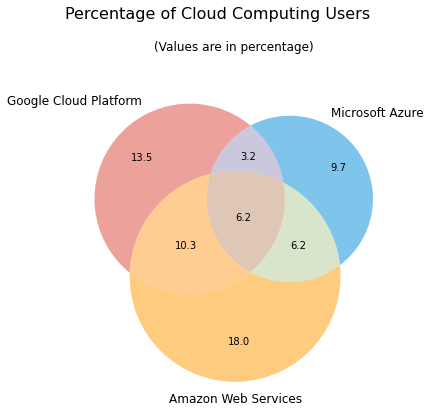

In [ ]:
df = data[q26a_list_of_columns]
df.dropna(how='all',inplace=True)
df = binarize_data(df)

df['Q26_Google'] = df['Q26_A_Part_3']
df['Q26_Amazon'] = df['Q26_A_Part_1']
df['Q26_Microsoft'] = df['Q26_A_Part_2']

df['Q26_GandM'] = df['Q26_Google'] * df['Q26_Microsoft']
df['Q26_GandA'] = df['Q26_Google'] * df['Q26_Amazon']
df['Q26_MandA'] = df['Q26_Amazon'] * df['Q26_Microsoft']
df['Q26_GandMandA'] = df['Q26_Google'] * df['Q26_Amazon'] * df['Q26_Microsoft']
plt.figure(figsize=(15,6))
venn3(subsets = (13.5, 9.7, 3.2, 18.0, 10.3, 6.2, 6.2),set_colors=(google_color,azure_color,amazon_color), set_labels = ('Google Cloud Platform', 'Microsoft Azure', 'Amazon Web Services'), alpha = 0.5);

plt.suptitle('Percentage of Cloud Computing Users ',y = 1.05,fontsize=16,color='black')          
plt.title('(Values are in percentage)',pad=30)
plt.show() 


In [ ]:
df = data.dropna(axis=0,subset = q26a_list_of_columns,how='all')
countries = list(df['Q3'].unique())
countries.remove('Other')
product = []
percentage = []
country_list = []
country_code = []

for country in countries:
    temp_df = df[df['Q3'] == country]
    country_list.append(country)
    country_code.append(country_codes[country])
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1)) 
    country_list.append(country)
    country_code.append(country_codes[country])
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    country_list.append(country)
    country_code.append(country_codes[country])
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 
    
df = pd.DataFrame(list(zip(country_list,country_code, product,percentage)), columns =['country','code' ,'Cloud Computing Platforms','percentage']) 

fig = px.scatter_geo(df, locations="code", color="Cloud Computing Platforms",
                     hover_name="country", size="percentage",
                     projection="natural earth",title='<b>Percentage of Cloud Computing Platform Users : Worldwide</b><br>(Toggle the legend)',size_max=30,opacity=0.5)
fig.data[0]['marker'].update(color=amazon_color) 
fig.data[1]['marker'].update(color=azure_color) 
fig.data[2]['marker'].update(color=google_color)
fig.show()


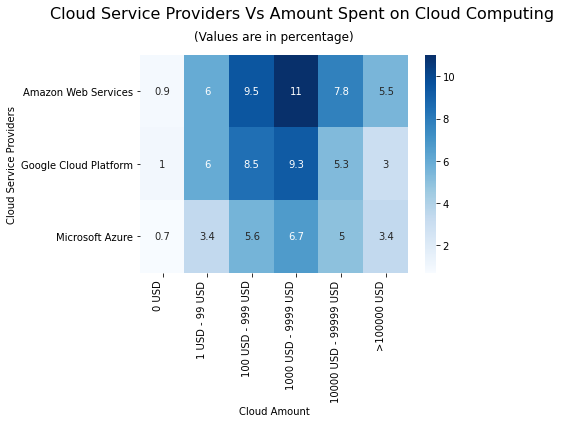

In [ ]:
df = data[q26a_list_of_columns]
df['Q25'] = data['Q25']
df = df.dropna(subset=q26a_list_of_columns, how='all')
df = df[df['Q25'].notna()]

cloud_amt = list(df['Q25'].unique())
product = []
percentage = []
cloud_amt_list = []
for amt in cloud_amt:
    temp_df = df[df['Q25'] == amt]
    cloud_amt_list.append(amt)
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1))
    
    cloud_amt_list.append(amt)
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    
    cloud_amt_list.append(amt)
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 
heat_map_df = pd.DataFrame(list(zip(cloud_amt_list,product,percentage)), columns =['Cloud Amount' ,'Cloud Service Providers','percentage']) 
heat_map_df = heat_map_df.pivot( "Cloud Service Providers","Cloud Amount", "percentage")
heat_map_df['0 USD'] = heat_map_df['$0 ($USD)']
heat_map_df['1 USD - 99 USD'] = heat_map_df['$1-$99']
heat_map_df['100 USD - 999 USD'] = heat_map_df['$100-$999']
heat_map_df['1000 USD - 9999 USD'] = heat_map_df['$1000-$9,999']
heat_map_df['10000 USD - 99999 USD'] = heat_map_df['$10,000-$99,999']
heat_map_df['>100000 USD'] = heat_map_df['$100,000 or more ($USD)']

heat_map_df.drop(['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)'],axis=1,inplace=True)
heatmap = sns.heatmap(heat_map_df, cmap="Blues", annot=True);
plt.suptitle('Cloud Service Providers Vs Amount Spent on Cloud Computing',
fontsize=16,y = 1.05)
plt.title('(Values are in percentage)',pad=15)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right');
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=90, ha='right');


In [ ]:
df = data[q26a_list_of_columns]
df['Q5'] = data['Q5']
df = df.dropna(subset=q26a_list_of_columns, how='all')
df = df[df['Q5'].notna()]

roles = list(df['Q5'].unique())
product = []
percentage = []
roles_list = []

for role in roles:
    temp_df = df[df['Q5'] == role]
    roles_list.append(role)
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1))
    
    roles_list.append(role)
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    
    roles_list.append(role)
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 
    
df = pd.DataFrame(list(zip(roles_list,product,percentage)), columns =['Role' ,'Cloud Service Providers','percentage']) 

fig = px.bar(df, x="Role", y="percentage",
             color='Cloud Service Providers', barmode='group',
             height=400,color_discrete_sequence=[amazon_color,azure_color,google_color])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='Cloud Service Providers Vs Job Roles',
                   yaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()


In [ ]:
df = data[q26a_list_of_columns]
df['Q6'] = data['Q6']
df = df.dropna(subset=q26a_list_of_columns, how='all')
df = df[df['Q6'].notna()]

experience = list(df['Q6'].unique())
product = []
percentage = []
exp_list = []

for exp in experience:
    temp_df = df[df['Q6'] == exp]
    exp_list.append(exp)
    product.append('Amazon Web Services')
    percentage.append(round(float(temp_df['Q26_A_Part_1'].count()*100/len(df)),1))
    
    exp_list.append(exp)
    product.append('Microsoft Azure')
    percentage.append(round(float(temp_df['Q26_A_Part_2'].count()*100/len(df)),1)) 
    
    exp_list.append(exp)
    product.append('Google Cloud Platform')
    percentage.append(round(float(temp_df['Q26_A_Part_3'].count()*100/len(df)),1)) 

df = pd.DataFrame(list(zip(exp_list,product,percentage)), columns =['Experience' ,'Cloud Service Providers','percentage']) 

fig = px.bar(df, x="Experience", y="percentage",
             color='Cloud Service Providers', barmode='group',
             height=400,color_discrete_sequence=[amazon_color,azure_color,google_color])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='Cloud Service Providers Vs Coding Experience',
                   yaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()



In [ ]:
df = data[q10_list_of_columns]
df = df.dropna(how='all')

m_azure_notebook = round(float(df['Q10_Part_3'].count()*100/len(df)),1)
a_sagemaker = round(float(df['Q10_Part_8'].count()*100/len(df)),1)
a_emr = round(float(df['Q10_Part_9'].count()*100/len(df)),1)
g_cloudai = round(float(df['Q10_Part_10'].count()*100/len(df)),1)
g_cloud_datalab = round(float(df['Q10_Part_11'].count()*100/len(df)),1)
g_colab = round(float(df['Q10_Part_2'].count()*100/len(df)),1)

names = ['Azure Notebooks','Colab Notebooks','Google Cloud AI Platform Notebooks','Google Cloud Datalab Notebooks','Amazon Sagemaker Studio','Amazon EMR Notebooks']
values = [m_azure_notebook,g_colab,g_cloudai,g_cloud_datalab,a_sagemaker,a_emr]
colors = [azure_color,google_color,google_color,google_color,amazon_color,amazon_color]

fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors, 
    
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Notebook Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        
    ),margin_pad=10)


In [ ]:
df = data[q27a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_ec2 = round(float(df['Q27_A_Part_1'].count()*100/len(df)),1)
names.append('Amazon EC2')
values.append(a_ec2)
colors.append(amazon_color)

a_lambda = round(float(df['Q27_A_Part_2'].count()*100/len(df)),1)
names.append('Amazon Lambda')
values.append(a_lambda)
colors.append(amazon_color)

a_ecs = round(float(df['Q27_A_Part_3'].count()*100/len(df)),1)
names.append('Amazon Elastic Container Service')
values.append(a_ecs)
colors.append(azure_color)

m_cloud = round(float(df['Q27_A_Part_4'].count()*100/len(df)),1)
names.append('Azure Cloud Services')
values.append(m_cloud)
colors.append(azure_color)

m_aci = round(float(df['Q27_A_Part_5'].count()*100/len(df)),1)
names.append('Microsoft Azure Container Instances')
values.append(m_aci)
colors.append(azure_color)

m_functions = round(float(df['Q27_A_Part_6'].count()*100/len(df)),1)
names.append('Azure Functions')
values.append(m_functions)
colors.append(azure_color)

g_engine = round(float(df['Q27_A_Part_7'].count()*100/len(df)),1)
names.append('Google Cloud Compute Engine')
values.append(g_engine)
colors.append(google_color)

g_functions = round(float(df['Q27_A_Part_8'].count()*100/len(df)),1)
names.append('Google Cloud Functions')
values.append(g_functions)
colors.append(google_color)

g_run = round(float(df['Q27_A_Part_9'].count()*100/len(df)),1)
names.append('Google Cloud Run')
values.append(g_run)
colors.append(google_color)

g_app = round(float(df['Q27_A_Part_10'].count()*100/len(df)),1)
names.append('Google Cloud App Engine')
values.append(g_app)
colors.append(google_color)


fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors 
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Cloud Computing Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        
    ),margin_pad=10)


In [ ]:
df = data[q28a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_sage = round(float(df['Q28_A_Part_1'].count()*100/len(df)),1)
names.append('Amazon SageMaker')
values.append(a_sage)
colors.append(amazon_color)

a_forecast = round(float(df['Q28_A_Part_2'].count()*100/len(df)),1)
names.append('Amazon Forecast')
values.append(a_forecast)
colors.append(amazon_color)

a_rekog = round(float(df['Q28_A_Part_3'].count()*100/len(df)),1)
names.append('Amazon Rekognition')
values.append(a_rekog)
colors.append(amazon_color)

m_mls = round(float(df['Q28_A_Part_4'].count()*100/len(df)),1)
names.append('Azure Machine Learning Studio')
values.append(m_mls)
colors.append(azure_color)

m_cognitive = round(float(df['Q28_A_Part_5'].count()*100/len(df)),1)
names.append('Azure Cognitive Services')
values.append(m_cognitive)
colors.append(azure_color)

g_ai = round(float(df['Q28_A_Part_6'].count()*100/len(df)),1)
names.append('Google Cloud AI Platform')
values.append(g_ai)
colors.append(google_color)

g_videoai = round(float(df['Q28_A_Part_7'].count()*100/len(df)),1)
names.append('Google Cloud Video AI')
values.append(g_videoai)
colors.append(google_color)

g_nlp = round(float(df['Q28_A_Part_8'].count()*100/len(df)),1)
names.append('Google Cloud Natural Language')
values.append(g_nlp)
colors.append(google_color)

g_vision = round(float(df['Q28_A_Part_9'].count()*100/len(df)),1)
names.append('Google Cloud Vision AI')
values.append(g_vision)
colors.append(google_color)

fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors 
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Machine Learning Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        
    ),margin_pad=10)


In [ ]:
df = data[q29a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_redshift = round(float(df['Q29_A_Part_11'].count()*100/len(df)),1)
names.append('Amazon Redshift')
values.append(a_redshift)
colors.append(amazon_color)

a_athena = round(float(df['Q29_A_Part_12'].count()*100/len(df)),1)
names.append('Amazon Athena')
values.append(a_athena)
colors.append(amazon_color)

a_DynamoDB = round(float(df['Q29_A_Part_13'].count()*100/len(df)),1)
names.append('Amazon DynamoDB')
values.append(a_DynamoDB)
colors.append(amazon_color)


m_datalake = round(float(df['Q29_A_Part_10'].count()*100/len(df)),1)
names.append('Microsoft Azure Data Lake Storage')
values.append(m_datalake)
colors.append(azure_color)

g_bigquery = round(float(df['Q29_A_Part_14'].count()*100/len(df)),1)
names.append('Google Cloud Bigquery')
values.append(g_bigquery)
colors.append(google_color)

g_sql = round(float(df['Q29_A_Part_15'].count()*100/len(df)),1)
names.append('Google Cloud SQL')
values.append(g_sql)
colors.append(google_color)

g_firestore = round(float(df['Q29_A_Part_16'].count()*100/len(df)),1)
names.append('Google Cloud Firestore')
values.append(g_firestore)
colors.append(google_color)



fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Big Data Products</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=12,
    ),yaxis=dict(
        
        
    ),margin_pad=10)


In [ ]:
df = data[q31a_list_of_columns]
df = df.dropna(how='all')
names = []
values = []
colors = []

a_quicksight = round(float(df['Q31_A_Part_1'].count()*100/len(df)),1)
names.append('Amazon QuickSight')
values.append(a_quicksight)
colors.append(amazon_color)

m_powerbi = round(float(df['Q31_A_Part_2'].count()*100/len(df)),1)
names.append('Microsoft Power BI')
values.append(m_powerbi)
colors.append(azure_color)

g_datastudio = round(float(df['Q31_A_Part_3'].count()*100/len(df)),1)
names.append('Google Data Studio')
values.append(g_datastudio)
colors.append(google_color)





fig = go.Figure(data=[go.Bar(
    y=names,
    x=values,
    orientation='h',
    marker_color=colors,
    width =[0.2,0.2,0.2]
)])
fig.layout.template = 'plotly_white'
fig.update_layout(title_text='<b>Cloud Service Providers - Business Intelligence Tools</b>',
                   xaxis=dict(
        title='Percentage of Respondents',
        titlefont_size=16,
        tickfont_size=14,
    ),yaxis=dict(
        
        tickfont_size=12,
    ),margin_pad=10)
